In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df_b=pd.read_csv('business.csv')
df_e=pd.read_csv('economy.csv')

In [3]:
df_b.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [4]:
df_e.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [5]:
df_b.describe()

,num_code
count,93487.000000
mean,780.056147
std,147.616038
min,401.000000
25%,706.000000
50%,820.000000
75%,874.000000
max,996.000000


In [6]:
df_e.describe()

,num_code
count,206774.000000
mean,1706.096714
std,2320.463721
min,101.000000
25%,588.000000
50%,818.000000
75%,960.000000
max,9991.000000


In [7]:
df_b.shape

(93487, 11)

In [8]:
df_e.shape

(206774, 11)

In [9]:
df=pd.concat([df_e,df_b],axis=0)

In [10]:
df.to_csv('df.csv', index=False)

In [11]:
df.shape

(300261, 11)

In [12]:
df.describe()

,num_code
count,300261.000000
mean,1417.771709
std,1974.514439
min,101.000000
25%,637.000000
50%,818.000000
75%,927.000000
max,9991.000000


In [13]:
df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [14]:
df.isna().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

<AxesSubplot:>

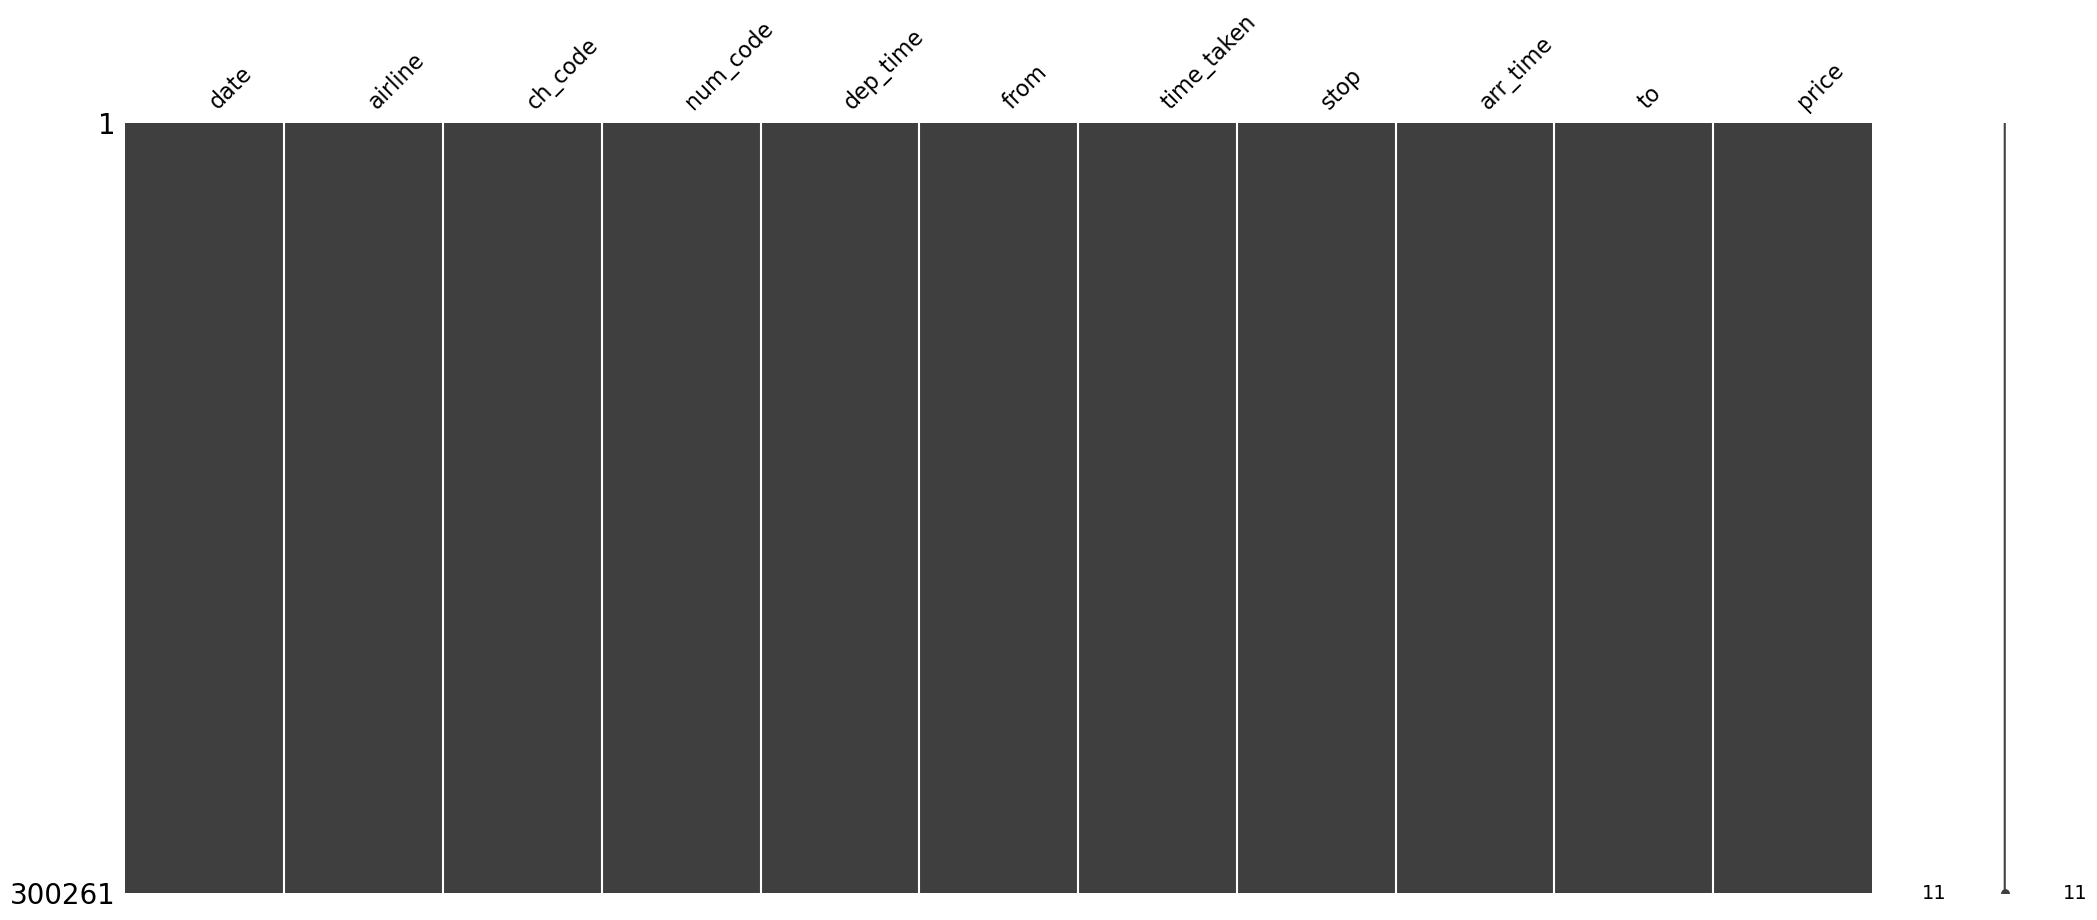

In [15]:
import missingno as mns
mns.matrix(df)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
dtypes: int64(1), object(10)
memory usage: 27.5+ MB


In [17]:
df

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"
...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265"
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105"
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099"
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585"


In [18]:
df=df.dropna()

In [19]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [20]:
# Select the column that contains unwanted characters
column_name = 'stop'

In [21]:
# Replace the unwanted characters with an empty string
df['stop'] = df['stop'].replace('\n', '').replace('\t', '')

In [22]:
# Print the modified dataframe
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [23]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-02-2022' in DD/MM/YYYY format. Provide format or specif

In [24]:
# Convert date column to datetime format
df['dep_time'] = pd.to_datetime(df['dep_time'])

In [26]:
# Convert date column to datetime format
df['arr_time'] = pd.to_datetime(df['arr_time'])

In [27]:
# convert quantity column to integers
df['price'] = df['price'].str.replace(',', '')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300259 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        300259 non-null  datetime64[ns]
 1   airline     300259 non-null  object        
 2   ch_code     300259 non-null  object        
 3   num_code    300259 non-null  int64         
 4   dep_time    300259 non-null  datetime64[ns]
 5   from        300259 non-null  object        
 6   time_taken  300259 non-null  object        
 7   stop        300259 non-null  object        
 8   arr_time    300259 non-null  datetime64[ns]
 9   to          300259 non-null  object        
 10  price       300259 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 27.5+ MB


In [29]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-11-02,SpiceJet,SG,8709,2023-03-08 18:55:00,Delhi,02h 10m,non-stop,2023-03-08 21:05:00,Mumbai,5953
1,2022-11-02,SpiceJet,SG,8157,2023-03-08 06:20:00,Delhi,02h 20m,non-stop,2023-03-08 08:40:00,Mumbai,5953
2,2022-11-02,AirAsia,I5,764,2023-03-08 04:25:00,Delhi,02h 10m,non-stop,2023-03-08 06:35:00,Mumbai,5956
3,2022-11-02,Vistara,UK,995,2023-03-08 10:20:00,Delhi,02h 15m,non-stop,2023-03-08 12:35:00,Mumbai,5955
4,2022-11-02,Vistara,UK,963,2023-03-08 08:50:00,Delhi,02h 20m,non-stop,2023-03-08 11:10:00,Mumbai,5955


In [30]:
# convert quantity column to int64 data type
df['price'] = df['price'].astype('int64')

In [31]:
df['date'] = df['date'].astype('int64')

In [32]:
df['dep_time'] = df['dep_time'].astype('int64')

In [33]:
df['arr_time'] = df['arr_time'].astype('int64')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300259 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300259 non-null  int64 
 1   airline     300259 non-null  object
 2   ch_code     300259 non-null  object
 3   num_code    300259 non-null  int64 
 4   dep_time    300259 non-null  int64 
 5   from        300259 non-null  object
 6   time_taken  300259 non-null  object
 7   stop        300259 non-null  object
 8   arr_time    300259 non-null  int64 
 9   to          300259 non-null  object
 10  price       300259 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 27.5+ MB


In [35]:
# convert quantity column to integers
df['stop'] = df['stop'].str.replace('\n', '')

In [75]:
# Create two empty lists to store the dates and prices separately
dates = []
prices = []

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('model.pkl', 'wb')
# dump information to that file
pickle.dump(rf_reg, file)

In [ ]:
import pickle
path = 'model.pkl'
model = open(path,'rb')
rf_model = pickle.load(model)